### Cap. 10 - Introdução às Redes Neurais Artificiais 

As redes neurais artificiais nasceram com a inspiração biológica do neurônio. O neurônio artificial se chamava Perceptron e foi usado para fazer operações lógicas, embora tivesse algumas limitações ( como um XOR). Algumas dessas limitações puderam ser superadas ou com melhorias em seu algoritmo ou com o empilhamento de neurônios - é o caso do Multi Layer Perceptron, que conseguiu superar a limitação inicial de aprender padrões XOR ( não-exclusivo).

Tensorflow é uma tecnologia para computação de tensores, um tipo de dado multidimensional ( como arrays são para 1 dimensão, matrizes para 2, tensores são para N). Esses tensores representam o espaço problema que será navegado pelos algoritmos de redes neurais.

#### Keras e tensorflow

Keras é uma camada de alto nível para implementação de redes neurais. Pode usar vários backends, dentre eles o Tensorflow.

Aqui trabalharemos com o Fashion MNINST, que é uma base semelhante àquela de dígitos escritos à mão mas que contém desenhos de roupas. Usaremos a Sequential API, que é um dos modos de uso do Keras que se baseia na premissa de que a rede neural é definida como uma lista de camadas, executada sequencialmente.

In [1]:
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

tf.__version__


2023-01-29 19:27:06.249765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-29 19:27:17.254494: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-29 19:27:17.254561: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-29 19:28:49.165500: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

'2.11.0'

In [2]:
keras.__version__

'2.11.0'

Cada arquivo é uma imagem de 28x28 pixels, com 10 classes. São 70k imagens em tons de cinza.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full),  (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Agora vamos tornar todos os pixels entre 0 e 1 já que usaremos gradiente descendente. Um jeito rápido de fazer isso é dividir tudo por 255, que é o valor máximo de intensidade de um pixel.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [6]:
import matplotlib.pyplot as plt

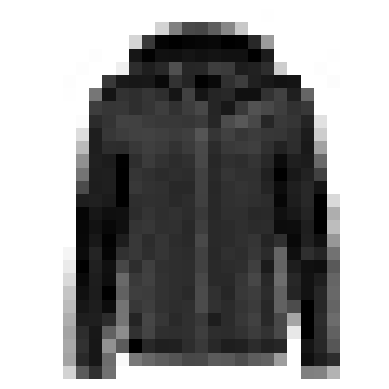

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

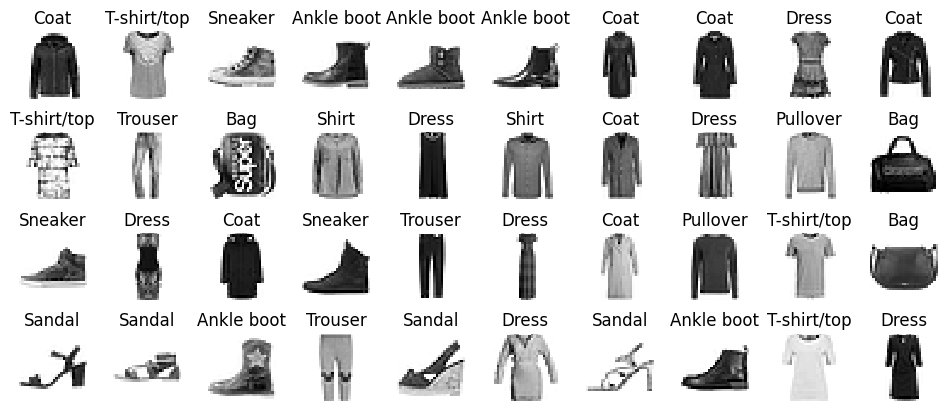

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Ok, agora vamos construir nosso modelo.

In [11]:
model = keras.models.Sequential() # nosso modelo será uma sequência de camadas 

model.add(keras.layers.Flatten(input_shape=[28,28])) # a camada inicial simplesmente vai serializar todos os pixels. A entrada tem 28x28
model.add(keras.layers.Dense(300,activation='relu')) # a próxima camada tem 300 neurônios e se ativa com ReLu
model.add(keras.layers.Dense(100, activation='relu')) # a camada seguinte tem 100 neurônios. ReLu basicamente substitui os valores negativos por zero, só ativa o que é maior que zero
model.add(keras.layers.Dense(10, activation='softmax')) #são 10 classes exclusivas então nossa saída é um softmax com 10 neurônios

2023-01-29 19:30:26.549320: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-29 19:30:26.603120: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-29 19:30:26.603241: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (edu-VJFE42F11X-XXXXXX): /proc/driver/nvidia/version does not exist
2023-01-29 19:30:26.689397: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.layers

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [17]:

model.get_layer(hidden1.name) is hidden1

True

In [18]:

weights, biases = hidden1.get_weights()

In [19]:
weights

array([[-0.02455467,  0.02107526, -0.02842683, ...,  0.07195002,
         0.0497661 ,  0.05920452],
       [-0.07150029, -0.03119739, -0.00667449, ..., -0.0661803 ,
         0.02755497,  0.00410585],
       [ 0.01203847,  0.0456213 , -0.04985731, ..., -0.00335825,
        -0.05794705,  0.01889919],
       ...,
       [-0.04839887,  0.01530993, -0.01331316, ..., -0.04149451,
        -0.03047439,  0.03964905],
       [-0.07302068,  0.00266114, -0.02520696, ..., -0.04800594,
         0.05668193,  0.00272246],
       [-0.02743471,  0.00144468, -0.05717437, ...,  0.05516906,
         0.01660269, -0.05758032]], dtype=float32)

In [20]:

weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Vamos compilar o modelo, de modo a especificar a função de perda e de otimização. A função de perda é uma forma de determinar a distância entre o certo e o errado. E a de otimização é como corrigir essa distância.

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Agora vamos treinar com o método fit

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

2023-01-29 19:30:36.020100: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.7302 - accuracy: 0.7610 - val_loss: 0.5158 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4914 - accuracy: 0.8282 - val_loss: 0.4368 - val_accuracy: 0.8550
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4459 - accuracy: 0.8414 - val_loss: 0.4313 - val_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4179 - accuracy: 0.8543 - val_loss: 0.4227 - val_accuracy: 0.8536
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3991 - accuracy: 0.8597 - val_loss: 0.3791 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3816 - accuracy: 0.8653 - val_loss: 0.3769 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3692 - accuracy: 0.8681 - val_loss: 0.3670 - val_accuracy:

In [24]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [25]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [26]:
history.history

{'loss': [0.730158805847168,
  0.49144935607910156,
  0.44589897990226746,
  0.41792500019073486,
  0.3990868926048279,
  0.3816356658935547,
  0.36923083662986755,
  0.3573335111141205,
  0.34683093428611755,
  0.3370218276977539,
  0.3290027379989624,
  0.32034820318222046,
  0.3123663365840912,
  0.30676135420799255,
  0.3002053499221802,
  0.294156014919281,
  0.2878306806087494,
  0.2821359634399414,
  0.2769421637058258,
  0.27202773094177246,
  0.2666846215724945,
  0.26198509335517883,
  0.25689229369163513,
  0.2531359791755676,
  0.24777130782604218,
  0.24473191797733307,
  0.24095475673675537,
  0.236393541097641,
  0.23291277885437012,
  0.2288070172071457],
 'accuracy': [0.7609636187553406,
  0.8281999826431274,
  0.841381847858429,
  0.854345440864563,
  0.859745442867279,
  0.8652727007865906,
  0.8681272864341736,
  0.8743454813957214,
  0.8772000074386597,
  0.8800181746482849,
  0.8832363486289978,
  0.885418176651001,
  0.8877454400062561,
  0.890218198299408,
  0.8

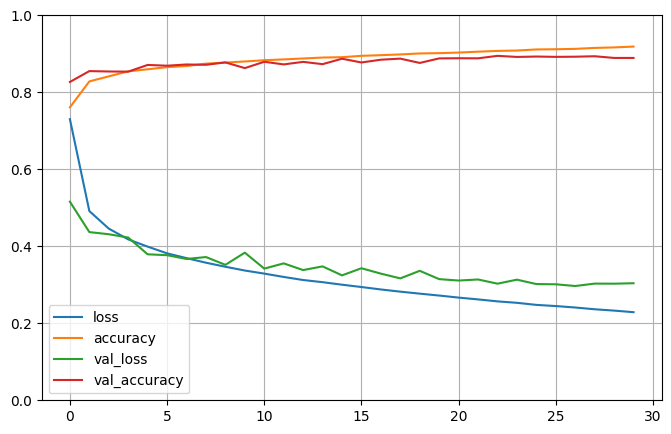

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Agora podemos ver como o modelo se sai na base de teste:

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 67.9065 - accuracy: 0.8424


[67.90653228759766, 0.8424000144004822]

### Fazendo previsões com o modelo
usaremos o método predict para isso

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 100ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 16ms/step


array([9, 2, 1])

In [31]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [32]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

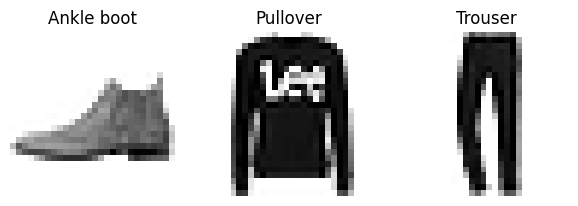

In [33]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Regressão com Sequential API

Para estudar a regressão vamos voltar ao problema dos imóveis na Califórnia e resolvê-lo usando uma rede neural de regressão.

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.5370 - val_loss: 2.1386
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7516 - val_loss: 0.7287
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6691 - val_loss: 0.8014
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6407 - val_loss: 0.5950
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6158 - val_loss: 0.5730
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5936 - val_loss: 0.5898
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5747 - val_loss: 0.6150
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5578 - val_loss: 0.5184
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5405 - val_loss: 0.5404
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5254 - val_loss: 0.5822

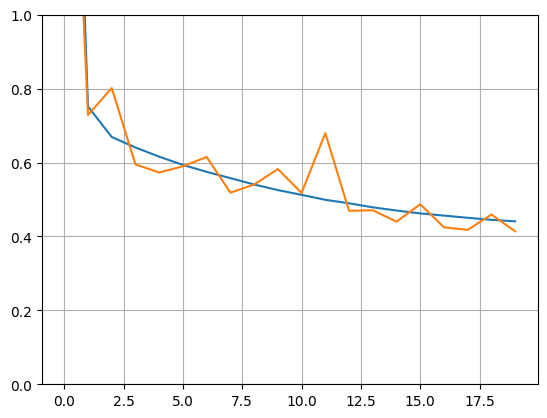

In [37]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Functional API

As vezes queremos padrões mais complexos do que simplesmente empilhar camadas. Para esses casos usamos a Functional API do keras. Um exemplo desse tipo de arquitetura é a Wide and Deep, que é uma rede que liga neurônios de entrada nas camadas finais, ao mesmo tempo que há uma rota normal. Isso permite aprender padrões complexos ao mesmo tempo que aprende regras simples.

In [38]:
#arquitetura wide and deep
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_9[0][0]']            

In [40]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.7758 - val_loss: 2.2474
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6659 - val_loss: 0.9283
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5966 - val_loss: 0.5688
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5546 - val_loss: 0.5148
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5295 - val_loss: 0.5334
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5079 - val_loss: 0.4670
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4913 - val_loss: 0.4498
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4775 - val_loss: 0.4714
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4651 - val_loss: 0.4313
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4551 - val_loss: 0.4229

In [41]:
model.save('modelo1.h5')

In [42]:
model = keras.models.load_model('modelo1.h5')

### Callbacks
As vezes o treinamento pode ser **muito demorado** e é necessário que saibamos pontos específicos de desempenho até para definir critérios de parada por exemplo. Faemos isso por meio de callbacks.

In [43]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])   

In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4581 - val_loss: 0.4216
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4459 - val_loss: 0.4125
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4365 - val_loss: 0.4053
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4276 - val_loss: 0.4315
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4216 - val_loss: 0.4024
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4152 - val_loss: 0.4160
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4110 - val_loss: 0.4055
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4067 - val_loss: 0.3896
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4026 - val_loss: 0.4012
Epoch 10/10
162/162 [==============================] - 0s 887us/step - loss: 0.4053


In [47]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4028 - val_loss: 0.3936
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3993 - val_loss: 0.4189
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3963 - val_loss: 0.4036
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3926 - val_loss: 0.4151
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3905 - val_loss: 0.3799
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3871 - val_loss: 0.4124
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3855 - val_loss: 0.3928
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3832 - val_loss: 0.3719
Epoch 9/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3810 - val_loss: 0.3891
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3791 - val_lo

In [48]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [49]:

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

339/363 [===========================>..] - ETA: 0s - loss: 0.3532
val/train: 1.10
363/363 [==============================] - 1s 2ms/step - loss: 0.3547 - val_loss: 0.3900


### Tensorboard

É um dashboard para acompanhamento dos modelos no tensorflow.

In [50]:
root_logdir = os.path.join(os.curdir, "logs")

In [51]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./logs/run_2023_01_29-19_43_14'

In [52]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [54]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.5021 - val_loss: 0.9179
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6810 - val_loss: 0.6108
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6049 - val_loss: 0.5593
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5618 - val_loss: 0.5641
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5319 - val_loss: 0.5062
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5072 - val_loss: 0.4977
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4890 - val_loss: 0.4534
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4735 - val_loss: 0.4508
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4606 - val_loss: 0.4312
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4499 - val_loss: 0.4229

In [61]:
%load_ext tensorboard
%tensorboard --logdir=./logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
2023-01-29 19:49:29.794755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-29 19:49:29.962513: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-29 19:49:29.962547: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-29 19:49:30.693749: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnv

In [56]:
run_logdir2 = get_run_logdir()
run_logdir2

'./logs/run_2023_01_29-19_47_05'

In [57]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [59]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5403 - val_loss: 14.8817
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6615 - val_loss: 2.5825
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4089 - val_loss: 0.3409
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3712 - val_loss: 0.3415
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3635 - val_loss: 0.3561
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3513 - val_loss: 0.3436
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3430 - val_loss: 0.3286
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3375 - val_loss: 0.3152
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3294 - val_loss: 0.3104
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3256 - val_loss: 0.327

In [63]:
%load_ext tensorboard
%tensorboard --logdir=./logs --port=6007

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Tune de hiperparâmetros

Assim como no sklearn podemos usar um gridsearchcv ou um randomsearch para buscar uma solução com os melhores hiperparâmetros. Para isso é interessante usar um wrapper para compatibilizar o keras com o sklearn.

In [64]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [66]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [68]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.5089 - val_loss: 29.3431
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8724 - val_loss: 1.0688
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5298 - val_loss: 0.5932
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4723 - val_loss: 0.4574
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4489 - val_loss: 0.4107
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4317 - val_loss: 0.4045
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4242 - val_loss: 0.3917
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4178 - val_loss: 0.3880
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4129 - val_loss: 0.3865
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4095 - val_l

In [69]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3533


In [70]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 50ms/step


In [71]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1200 - val_loss: 0.5274
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5159 - val_loss: 0.4425
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4600 - val_loss: 0.4110
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4477 - val_loss: 0.4045
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4425 - val_loss: 0.4145
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4376 - val_loss: 0.4143
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4534 - val_loss: 0.4064
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4325 - val_loss: 0.4070
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4301 - val_loss: 0.4051
Epoch 10/100
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f35fd0d0700>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298,...
                                                          0.005021425736625637,
                                                          0.0005703073595961105,
                                                          0.001151888789941251,
                                                          0.001621231156394198,
                                                          0.0024505367684280487,
                                                          0.011155092541719619,
                                                          0.0007524347058135697,
                                                          0.0032032448128444043,
                                                          0.004591455636549438,
                                                          0.0003715541189658278, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [72]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [73]:

rnd_search_cv.best_score_

-0.3183305462201436

In [74]:
rnd_search_cv.best_estimator_

In [75]:

rnd_search_cv.score(X_test, y_test) 

162/162 [==============================] - 1s 2ms/step - loss: 0.2921


-0.292136549949646